In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-06-30 13:08:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: 'helper_functions.py'

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-06-30 13:08:24 (14.6 MB/s) - 'helper_functions.py' saved [10246/10246]



In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

2024-06-30 13:08:30.038539: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-30 13:08:30.038677: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-30 13:08:30.150145: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import zipfile


!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-06-30 13:08:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 173.194.203.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: '10_food_classes_10_percent.zip'

10_food_classes_10_ 100%[===================>] 160.74M   117MB/s    in 1.4s    

2024-06-30 13:08:53 (117 MB/s) - '10_food_classes_10_percent.zip' saved [168546183/168546183]



In [4]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [6]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


building transfer learning feature extraction model using keras functional API and using EFFICENTNET as a model

In [7]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')

# If we were using something like ResNet50V2
# x = tf.keras.layes.experimental.preprocessing.Rescaling(1./255)(inputs)

x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent")])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent/20240630-130908
Epoch 1/5


I0000 00:00:1719752981.779187     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719752981.833688     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - accuracy: 0.2004 - loss: 2.2170

W0000 00:00:1719753003.369231     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1719753009.728555     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.2061 - loss: 2.2085 - val_accuracy: 0.6891 - val_loss: 1.4215
Epoch 2/5


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7171 - val_loss: 1.3730
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7190 - loss: 1.3159 - val_accuracy: 0.7467 - val_loss: 1.0283
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7878 - val_loss: 0.9760
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step - accuracy: 0.7893 - loss: 0.9240 - val_accuracy: 0.8235 - val_loss: 0.7548


W0000 00:00:1719753020.778684     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [8]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8099 - loss: 0.7845


[0.791258692741394, 0.8064000010490417]

In [9]:
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          7 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, None,      │          0 │ normalization[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, None,      │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ stem_conv_pad[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, None,      │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, None,      │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, None,      │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, None,      │          0 │ block1a_activati… │
│ (Multiply)          │ None, 32)         │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [10]:
model_0.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

check out our model training curves

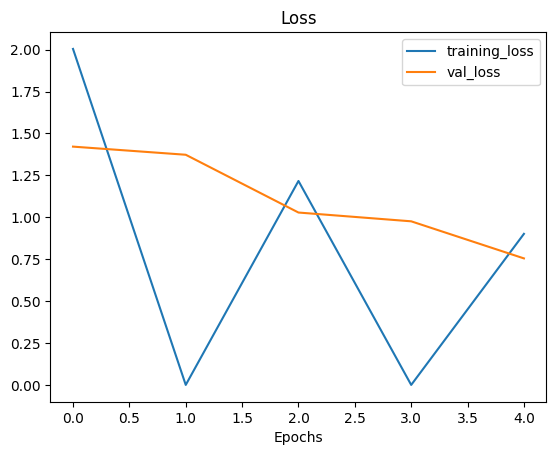

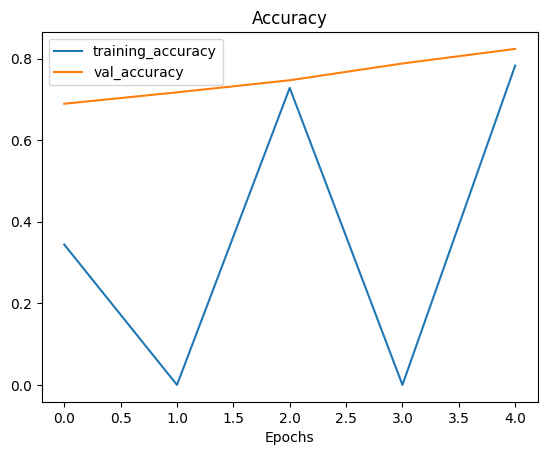

In [11]:
plot_loss_curves(history_0)

## Getting a feature vector from a trained model

In [12]:
# define the input shape
input_shape = (1,4,4,3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: {input_tensor}")

Random input tensor: [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]


In [13]:
global_average_pooled = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

In [14]:
print(f"2D global average pooled random tensor:\n {global_average_pooled}")

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]


We can see above that our tensor has been converted into a vector this is what we call the feature vector

In [15]:
print(f"Shape of our input tensor: {input_tensor.shape}")
print(f"Shape of our global average pooled: {global_average_pooled.shape}")

Shape of our input tensor: (1, 4, 4, 3)
Shape of our global average pooled: (1, 3)


## Running a series of transfer learning experiments

what will be the results if we use only 1% of training data now
How about we run a bunch of experiments to find out:
1. `model_1` - use feature extraction transfer learning with 1% of the training data with data augmentation
2. `model_2` - use feature extraction transfer learning with 10% of the training data with data augmentaion
3. `model_3` - use fine tuning transfer learning on 10% of the training data with data augmentation
4. `model_4` - use fine-tuning transfer learning on 100% of the training data with data augmentaion

## Model - 1

In [16]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2024-06-30 13:11:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 74.125.142.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: '10_food_classes_1_percent.zip'

10_food_classes_1_p 100%[===================>] 127.42M  48.0MB/s    in 2.7s    

2024-06-30 13:11:22 (48.0 MB/s) - '10_food_classes_1_percent.zip' saved [133612354/133612354]



In [17]:
train_dir_1_per = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [18]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [19]:
IMG_SIZE = (224, 224)
BATCH_SIZE=32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_per,
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                           label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode='categorical')


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding augmentation to our model
To add augmentation directly into our models, we can use layers inside:
`tf.keras.layers.experimental.preprocessing()`

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth

data_augmentation = keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomHeight(0.2),
    RandomWidth(0.2),
    # preprocessing.Rescale(1./255)
], name="data_augmentaion")

In [21]:
import tensorflow
tensorflow.__version__

'2.15.0'

## visualize data augmentation layer

(-0.5, 483.5, 401.5, -0.5)

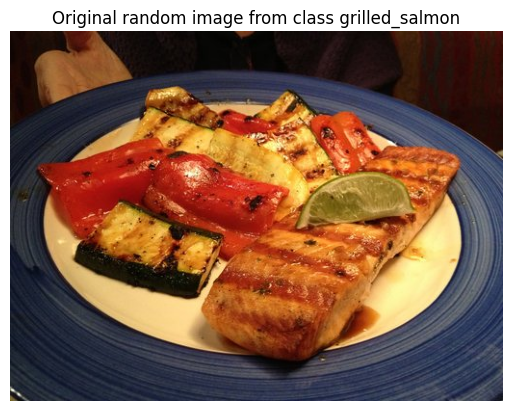

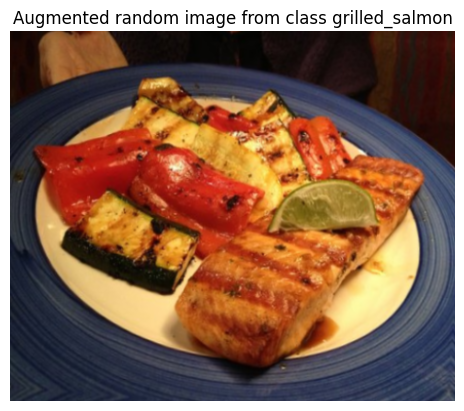

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_img = random.choice(os.listdir(target_dir))
random_img_path = target_dir + "/" + random_img
img = mpimg.imread(random_img_path)

plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)


augmented_img = data_augmentation(img)
plt.figure()
plt.imshow(augmented_img/255)
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False)

## Model-1 feature extraction transfer learning on 1% of the data

In [28]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name='input_layer')

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name='pooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x)

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="1_percent_data_aug")])

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_3" is incompatible with the layer: expected shape=(None, 512, 3), found shape=(None, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=input_layer>',)
  • kwargs={'mask': 'None'}

In [34]:
result_1_per = model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.2765 - loss: 2.0949


In [35]:
result_1_per

[2.0964627265930176, 0.2696000039577484]

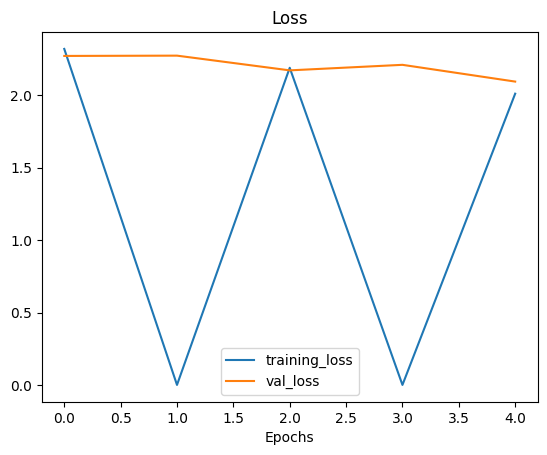

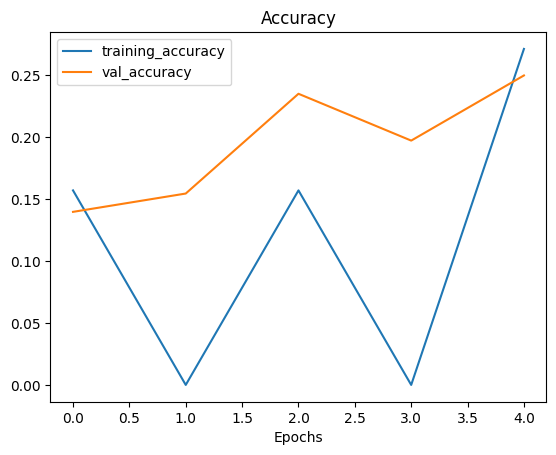

In [36]:
plot_loss_curves(history_1)

## Model - 2
feature extraction transfer learning model with 10% of data and data augmentation

In [29]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [30]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE=32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            image_size=IMG_SIZE,
                                                                            batch_size=BATCH_SIZE,
                                                                            label_mode='categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation and creating model

In [32]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth

data_augmentation = keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomHeight(0.2),
    RandomWidth(0.2),
    # preprocessing.Rescale(1./255)
], name="data_augmentaion")
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="pooled_layer")(x)
output = layers.Dense(10, activation='softmax', name="output_layer")(x)
model_2 = tf.keras.Model(inputs, output)

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])



In [33]:
model_2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentaion (Sequential)   │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooled_layer                    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

## Creating a model checkpoint

In [34]:
checkpoint_path = "/tmp/ckpt/checkpoint.weights.h5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

## Fit model - 2 passing in the ModelCheckpoint Callback

In [35]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20240630-131438
Epoch 1/5


2024-06-30 13:14:48.249851: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_6_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.1902 - loss: 2.2148
Epoch 1: saving model to /tmp/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 408ms/step - accuracy: 0.1942 - loss: 2.2085 - val_accuracy: 0.5115 - val_loss: 1.6305
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.5453 - loss: 1.5615
Epoch 2: saving model to /tmp/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.5464 - loss: 1.5578 - val_accuracy: 0.7155 - val_loss: 1.1645
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.6971 - loss: 1.1763
Epoch 3: saving model to /tmp/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.6969 - loss: 1.1759 - val_accuracy: 0.7714 - val_loss: 0.9468
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7556 - loss: 1.0508
Epoch 4: saving model to /tmp/ckpt/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.7554 - loss: 1.0491 - val_accuracy:

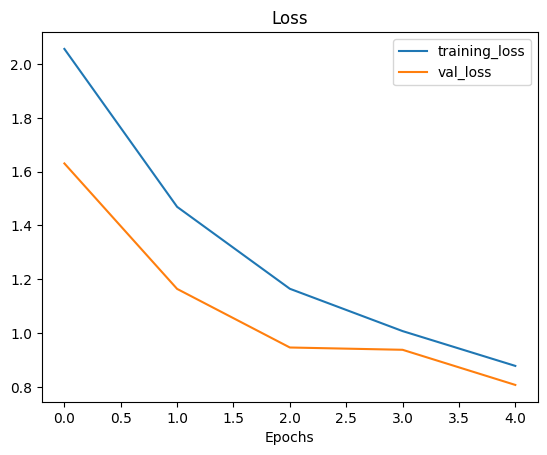

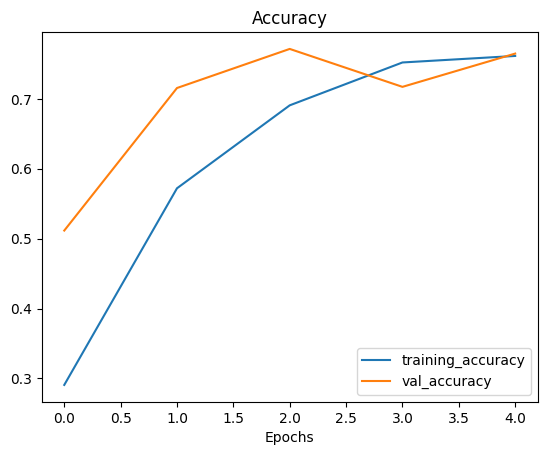

In [36]:
plot_loss_curves(history_10_percent_data_aug)

In [37]:
results_10_per_aug = model_2.evaluate(test_data)
results_10_per_aug

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.7972 - loss: 0.7699


[0.7949928045272827, 0.7799999713897705]

## Loading in checkpointed weights
loading in checkpointed weights returns a model to a specific checkpoint

In [38]:
model_2.load_weights(checkpoint_path)

In [39]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.7948 - loss: 0.7842


In [40]:
results_10_per_aug == loaded_weights_model_results

False

In [41]:
results_10_per_aug

[0.7949928045272827, 0.7799999713897705]

In [42]:
loaded_weights_model_results

[0.7949926257133484, 0.7799999713897705]

## Model - 3 : Fine-tuning an existing model on 10% of the data 

In [58]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentaion, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=pooled_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [60]:
for layers in model_2.layers:
    print(layers, layers.trainable)

<InputLayer name=input_layer, built=True> True
<Sequential name=data_augmentaion, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=pooled_layer, built=True> True
<Dense name=output_layer, built=True> True


To begin fine tuning lets start by setting the last 10 layers of our base model.trainable = True 

In [45]:
base_model.trainable = True 
for layer in base_model.layers[:-10]:
    layer.trainable = False 
    
model_2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=['accuracy'])


In [46]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
    print(layer_number, layer.name, layer.trainable)

0 input_layer_7 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_sque

In [48]:
model_2.trainable_variables

[<KerasVariable shape=(1, 1, 1152, 48), dtype=float32, path=block7a_se_reduce/kernel>,
 <KerasVariable shape=(48,), dtype=float32, path=block7a_se_reduce/bias>,
 <KerasVariable shape=(1, 1, 48, 1152), dtype=float32, path=block7a_se_expand/kernel>,
 <KerasVariable shape=(1152,), dtype=float32, path=block7a_se_expand/bias>,
 <KerasVariable shape=(1, 1, 1152, 320), dtype=float32, path=block7a_project_conv/kernel>,
 <KerasVariable shape=(320,), dtype=float32, path=block7a_project_bn/gamma>,
 <KerasVariable shape=(320,), dtype=float32, path=block7a_project_bn/beta>,
 <KerasVariable shape=(1, 1, 320, 1280), dtype=float32, path=top_conv/kernel>,
 <KerasVariable shape=(1280,), dtype=float32, path=top_bn/gamma>,
 <KerasVariable shape=(1280,), dtype=float32, path=top_bn/beta>,
 <KerasVariable shape=(1280, 10), dtype=float32, path=output_layer/kernel>,
 <KerasVariable shape=(10,), dtype=float32, path=output_layer/bias>]

In [49]:
print(len(model_2.trainable_variables))

12


In [51]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_per_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=fine_tune_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          initial_epoch=history_10_percent_data_aug.epoch[-1],
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20240630-132632
Epoch 5/10


2024-06-30 13:26:42.857703: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_6_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step - accuracy: 0.7890 - loss: 0.8819 - val_accuracy: 0.8092 - val_loss: 0.6649
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.8306 - loss: 0.6898 - val_accuracy: 0.8224 - val_loss: 0.5874
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.8158 - loss: 0.6983 - val_accuracy: 0.8289 - val_loss: 0.5919
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.8453 - loss: 0.5556 - val_accuracy: 0.8109 - val_loss: 0.5992
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.8768 - loss: 0.4943 - val_accuracy: 0.8088 - val_loss: 0.5818
Epoch 10/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.8746 - loss: 0.4910 - val_accuracy: 0.8701 - val_loss: 0.4241


In [52]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8625 - loss: 0.4451


In [53]:
results_fine_tune_10_percent


[0.4727279245853424, 0.8528000116348267]

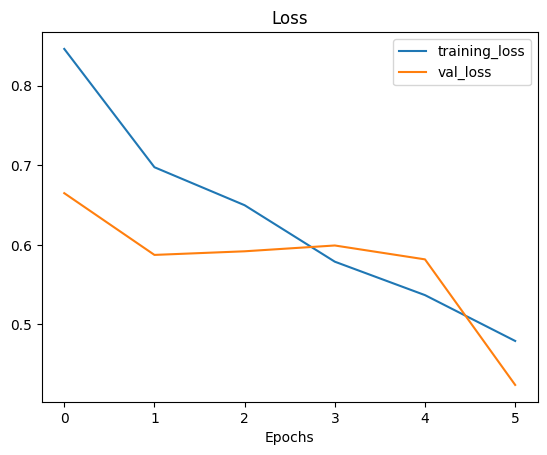

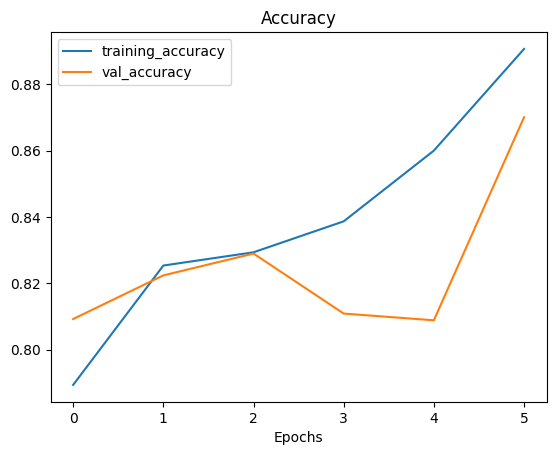

In [54]:
plot_loss_curves(history_fine_10_per_data_aug)

In [60]:
def compare_history(old_history, new_history, initial_epochs=5):
    total_acc = old_history.history["accuracy"] + new_history.history["accuracy"]
    total_loss = old_history.history["loss"] + new_history.history["loss"]
    total_val_loss = old_history.history["val_loss"] + new_history.history["val_loss"]
    total_val_accuracy = old_history.history["val_accuracy"] + new_history.history["val_accuracy"]
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_accuracy, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
    plt.legend()
    plt.title("Traning and Validation Accuracy")
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
    plt.legend()
    plt.title("Traning and Validation Loss")

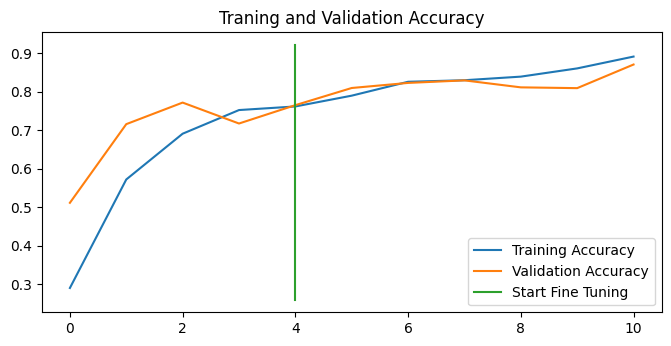

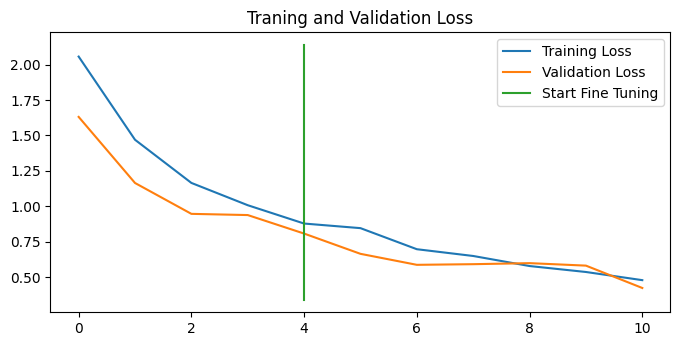

In [61]:
compare_history(history_10_percent_data_aug, history_fine_10_per_data_aug, initial_epochs=5)

## Model - 4: Fine-tuning existing model on all of the data 

In [62]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-06-30 13:42:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: '10_food_classes_all_data.zip'

10_food_classes_all 100%[===================>] 495.13M   249MB/s    in 2.0s    

2024-06-30 13:42:49 (249 MB/s) - '10_food_classes_all_data.zip' saved [519183241/519183241]



In [63]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [64]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [67]:
import tensorflow 
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                image_size=IMG_SIZE,
                                                                                batch_size=BATCH_SIZE,
                                                                                label_mode='categorical')


test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size=IMG_SIZE,
                                                               batch_size=BATCH_SIZE,
                                                               label_mode='categorical')

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [68]:
# evaludate model_2 (The model_2 is now fine tuned on 10% of data)

model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.8576 - loss: 0.4729


[0.4727279245853424, 0.8528000116348267]

To train a fine tuning model we need to convert the model_2 back to its feature extraction weights 
  

In [69]:
model_2.load_weights(checkpoint_path)

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 26 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


what we have done so far 
1. trained a feature extraction transfer learning model for 5 epochs on 10% of the data with data augmentation and save the model's weight using ModelCheckpoint callback.
2. Fine_tuned the same model on the same 10% of the data for further 5 epochs with top 10 layers unfrozed(model_3).
3. saved the results and training logs each time 
4. reloaded the model from step 1 to do the same steps as step 2 except this time we are going to use all data 


In [73]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.7327 - loss: 0.8819


[0.8808806538581848, 0.7372000217437744]

In [72]:
for layer_number, layer in enumerate(model_2.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentaion True
2 efficientnetb0 True
3 pooled_layer True
4 output_layer True


In [74]:
model_2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [75]:
fine_tune_epochs = initial_epochs + 5
history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                          epochs=fine_tune_epochs,
                                          validation_data=test_data,
                                          validation_steps=in`t(0.25 * len(test_data)),
                                          initial_epoch=history_10_percent_data_aug.epoch[-1],
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                experiment_name="full_10_classes_fine_tune")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune/20240630-135921
Epoch 5/10


2024-06-30 13:59:32.784825: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_6_1/efficientnetb0_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


235/235 ━━━━━━━━━━━━━━━━━━━━ 53s 172ms/step - accuracy: 0.7568 - loss: 0.7542 - val_accuracy: 0.9095 - val_loss: 0.2707
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 156ms/step - accuracy: 0.8457 - loss: 0.4616 - val_accuracy: 0.8717 - val_loss: 0.3743
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 159ms/step - accuracy: 0.8747 - loss: 0.3929 - val_accuracy: 0.9326 - val_loss: 0.2197
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 153ms/step - accuracy: 0.8818 - loss: 0.3394 - val_accuracy: 0.9260 - val_loss: 0.2437
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 154ms/step - accuracy: 0.9068 - loss: 0.2949 - val_accuracy: 0.9118 - val_loss: 0.2255
Epoch 10/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 153ms/step - accuracy: 0.9202 - loss: 0.2547 - val_accuracy: 0.9227 - val_loss: 0.2242


In [77]:
results_final = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.9179 - loss: 0.2405


In [79]:
results_final

[0.2435278594493866, 0.9168000221252441]

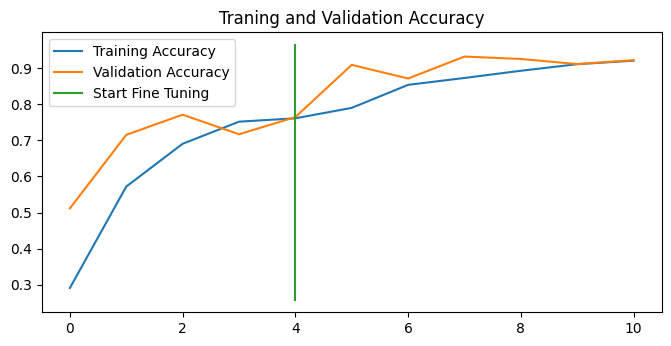

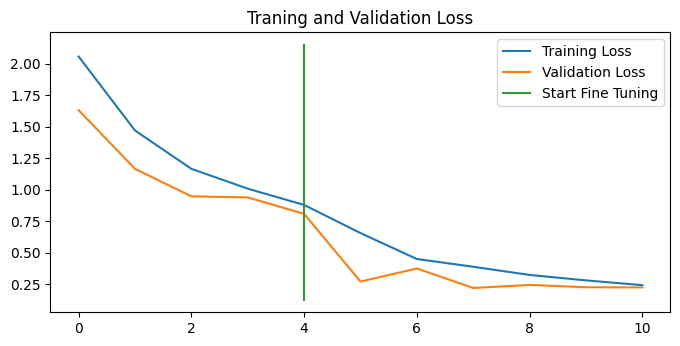

In [80]:
compare_history(history_10_percent_data_aug, history_fine_10_classes_full)